# Test Environment

This notebook verifies that the required packages for MNE are installed and working correctly.

Recall that commands inside of cells starting with "!" are run on the underlying system.

In [1]:
!pwd

/home/tyler/Documents/eeg-dev/StudyTemplate/code


This functionality can be used to install packages from within a notebook.

**NOTE**: This requies you to restart the kernal once the installation has completed.

This can be done from the top menu of Jupyter via: "Kernel -> Restart Kernel..."

In [2]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 11.1 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 10.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 11.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/64.6 KB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 11.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 5.7 MB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 KB 8.2 MB/s eta 0:00:0031m13.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 11.4 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  U

Assuming the package has installed correctly, the below cells are some simple tests written by the MNE developers to verify that things are working correctly.

In [4]:
import mne

In [9]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = (
    sample_data_folder / "MEG" / "sample" / "sample_audvis_filt-0-40_raw.fif"
)
raw = mne.io.read_raw_fif(sample_data_raw_file)
raw

Opening raw data file /home/tyler/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


Measurement date,"December 03, 2002 19:01:10 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,146 points
Good channels,"203 Gradiometers, 102 Magnetometers, 9 Stimulus, 59 EEG, 1 EOG"
Bad channels,"MEG 2443, EEG 053"
EOG channels,EOG 061
ECG channels,Not available
Sampling frequency,150.15 Hz
Highpass,0.10 Hz
Lowpass,40.00 Hz


We should have been presented with some summary information about an MEG file.

Next to verify is some plotting functions.

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 13.639 (s)
Plotting power spectral density (dB=True).


/tmp/ipykernel_237044/2847632005.py:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd()
/home/tyler/Documents/eeg-dev/StudyTemplate/env/lib/python3.10/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


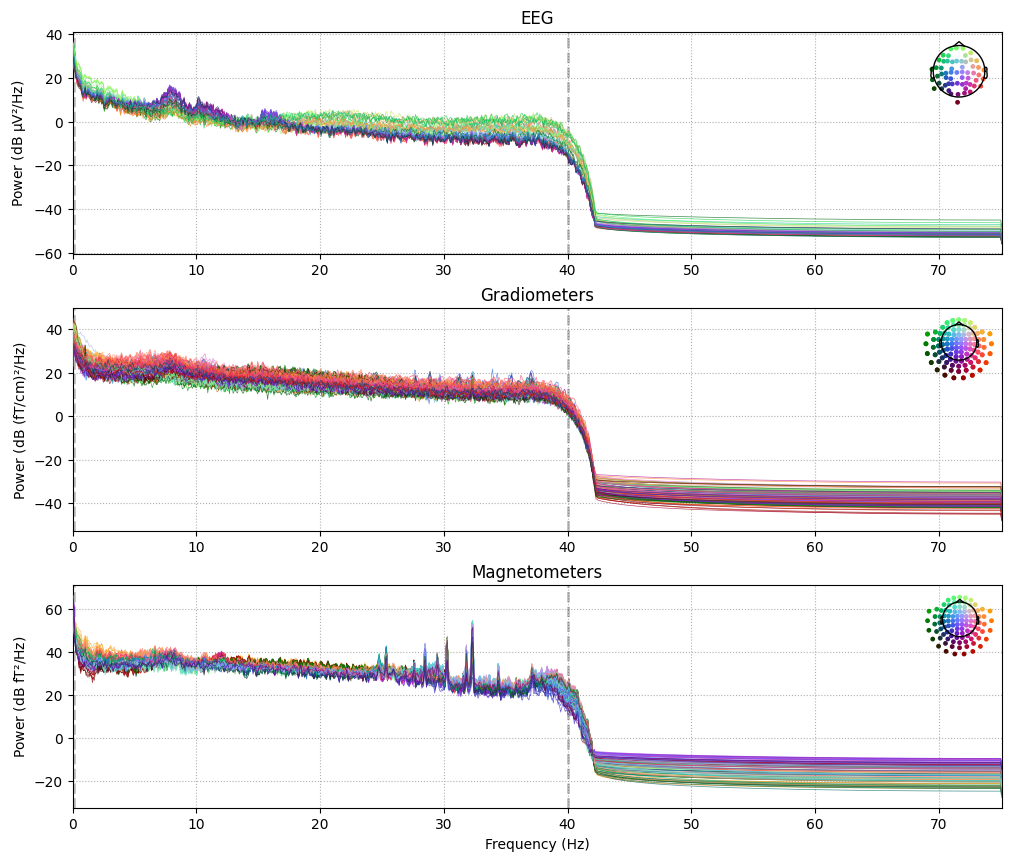

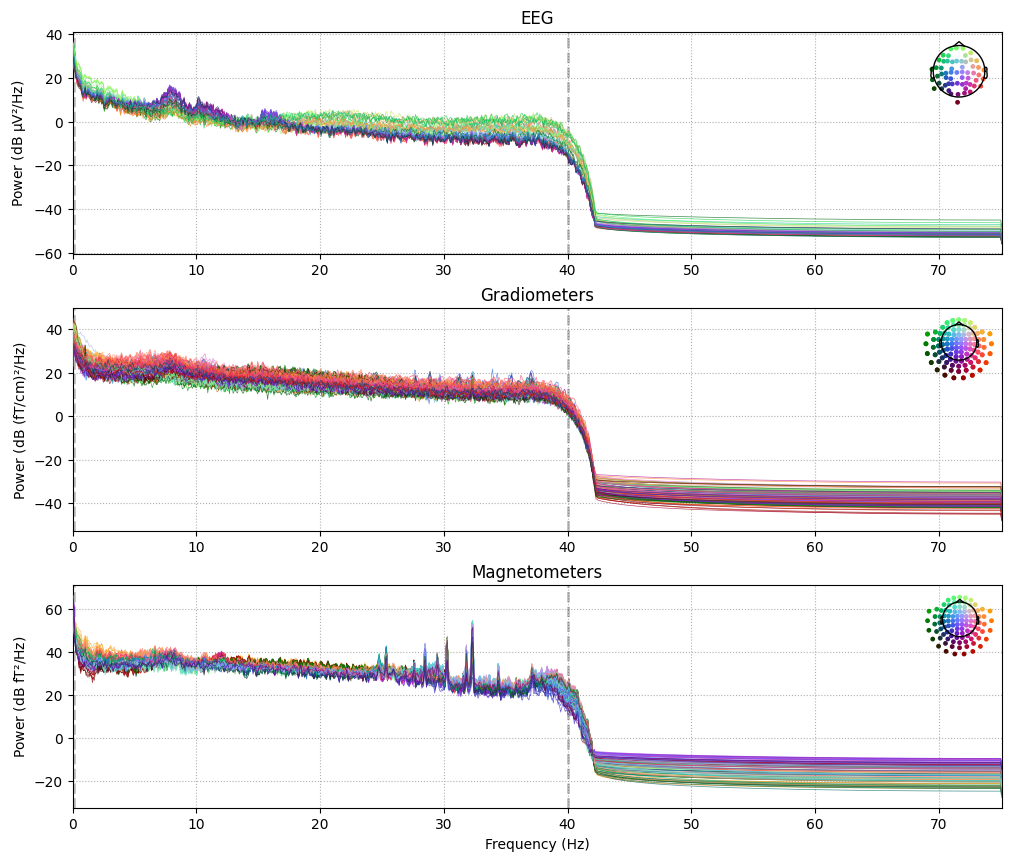

In [10]:
raw.plot_psd()

Let's verify that the modern scrollplot functionality is present and working by first installing the main plotting package:

In [12]:
!pip install mne-qt-browser

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.9 MB/s eta 0:00:0031m12.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.8/871.8 KB 11.2 MB/s eta 0:00:0031m12.2 MB/s eta 0:00:01
  Using cached QtPy-2.4.1-py3-none-any.whl (93 kB)
  Using cached darkdetect-0.8.0-py3-none-any.whl (9.0 kB)


In [13]:
raw.plot(picks='eeg')

ImportError: No Qt binding found, please install PyQt6, PyQt5, PySide6, or PySide2

This may error saying that "No Qt binding found, please install PyQt6, PyQt5, PySide6, or PySide2".

This is because the scrollplot uses an external library and Python does not yet know how to talk to it.

We can fix this by installing our Qt bindings of choice:

In [14]:
!pip install PyQt5

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
  Using cached PyQt5-5.15.10-cp37-abi3-manylinux_2_17_x86_64.whl (8.2 MB)
  Using cached PyQt5_Qt5-5.15.2-py3-none-manylinux2014_x86_64.whl (59.9 MB)
  Using cached PyQt5_sip-12.13.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.whl (338 kB)


Our plotting function should now likely work

In [15]:
raw.plot(picks='eeg')

Using qt as 2D backend.


Channels marked as bad:
['MEG 2443', 'EEG 053']
